In [60]:
from control import NonlinearIOSystem, input_output_response, InterconnectedSystem
from numpy import linspace, matrix, arctan2

from matplotlib.pyplot import figure, style
from matplotlib import rcParams

style.use("dark_background")

rcParams["figure.facecolor"] = (43/256, 43/256, 43/256)
rcParams["axes.facecolor"] = (43/256, 43/256, 43/256)
rcParams["legend.facecolor"] = (43/256, 43/256, 43/256)
rcParams["axes.grid"] = True
rcParams["lines.linewidth"] = 2.5
rcParams["grid.linewidth"] = 0.5

In [146]:
def embobinados(t, x, u, params):
    n = params.get("n", 200)
    
    m1, m2, m3, m4 = u
    
    ϕx = m1 - m2
    ϕy = m3 - m4
    
    return [ϕx, ϕy]

In [150]:
io_embobinados = NonlinearIOSystem(None, embobinados,
                                   inputs=("m1", "m2", "m3", "m4"),
                                   outputs=("ϕx", "ϕy"),
                                   name="embobinado")

In [151]:
def angulo(t, x, u, params):
    from numpy import arctan2, degrees
    n = params.get("n", 200)
    
    ϕx, ϕy = u
    
    ϕ = arctan2(ϕy, ϕx)
    
    return degrees(ϕ)

In [152]:
io_angulo = NonlinearIOSystem(None, angulo,
                              inputs=("ϕx", "ϕy"), outputs=("ϕ"), name="angulo")

In [153]:
secuencia = [[1,0,0,0],[1,0,1,0],[1,1,1,0],[0,1,1,0],
             [0,1,1,1],[0,1,0,1],[0,0,0,1],[1,0,0,1]]

def control(t, x, u, params):
    δ = 0.1
    n = t/δ
    
    señal_actual = secuencia[int(n%8)]
    
    return señal_actual

In [154]:
io_control = NonlinearIOSystem(None, control, inputs=("u"),
                               outputs=("m1", "m2", "m3", "m4"),
                               name="control")

In [158]:
motor = InterconnectedSystem(syslist=(io_control, io_embobinados, io_angulo),
                             connections=(("angulo.ϕx", "embobinado.ϕx"),
                                          ("angulo.ϕy", "embobinado.ϕy"),
                                          ("embobinado.m1", "control.m1"),
                                          ("embobinado.m2", "control.m2"),
                                          ("embobinado.m3", "control.m3"),
                                          ("embobinado.m4", "control.m4")),
                             inplist=("control.u"),
                             outlist=("angulo.ϕ"))

In [159]:
x0 = [1,0,0,0]
ts = linspace(0, 1, 1000)

In [161]:
t, y = input_output_response(sys=motor, T=ts, U=ts, X0=[0,0])

(0.0, 1.0)

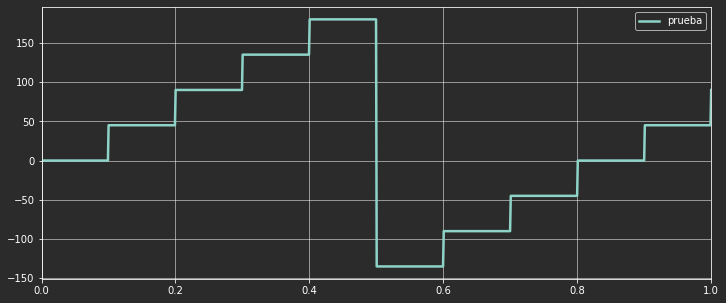

In [162]:
#t = linspace(0, 1, 100)
fig = figure(figsize=(12,5))
ax = fig.gca()

ax.plot(t, y, label="prueba")
#ax.plot(t,[0 for a in t], label="hola")
ax.legend()
ax.set_xlim(min(t), max(t))